In [1]:
import keras.backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

2022-02-12 10:46:35.943117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-12 10:46:35.943145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# load the data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
#reshape the data
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtest = xtest.reshape(10000, 28, 28, 1)

In [4]:
ytest_true = ytest.copy()
#plt.imshow(xtrain[0], cmap='gray')
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [5]:
#Cov2D
from tensorflow.keras import backend as k
k.clear_session()
model = Sequential([
    Conv2D(filters=6, kernel_size=(3,3), strides=(1,1), padding='same',
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    BatchNormalization(),
    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),

    Flatten(),

    Dense(120, activation='relu'),
    Dropout(0.2),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

2022-02-12 10:47:02.727026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-12 10:47:02.727057: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-12 10:47:02.727083: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Jaguar): /proc/driver/nvidia/version does not exist
2022-02-12 10:47:02.727771: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 6)        24        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                        

In [7]:
##Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


In [8]:
history = model.fit(xtrain, ytrain, batch_size=32, epochs=10, validation_split=0.2)
history.history

Epoch 1/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2102 - accuracy: 0.9327 - val_loss: 0.0811 - val_accuracy: 0.9757
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0822 - accuracy: 0.9742 - val_loss: 0.0571 - val_accuracy: 0.9838
Epoch 3/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0522 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 5/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0562 - val_accuracy: 0.9827
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0425 - val_accuracy: 0.9882
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0552 -

{'loss': [0.21020843088626862,
  0.08221191167831421,
  0.06059536710381508,
  0.049759022891521454,
  0.038919847458601,
  0.035158365964889526,
  0.029907964169979095,
  0.026630094274878502,
  0.026351887732744217,
  0.02206912264227867],
 'accuracy': [0.9327499866485596,
  0.9742083549499512,
  0.981208324432373,
  0.9840624928474426,
  0.9870625138282776,
  0.9885833263397217,
  0.9900624752044678,
  0.9911458492279053,
  0.991812527179718,
  0.9929583072662354],
 'val_loss': [0.08113713562488556,
  0.057050690054893494,
  0.052159007638692856,
  0.05817678943276405,
  0.05623242259025574,
  0.04248006269335747,
  0.05522054061293602,
  0.04149748757481575,
  0.04908200725913048,
  0.04867624491453171],
 'val_accuracy': [0.9756666421890259,
  0.9838333129882812,
  0.984666645526886,
  0.9833333492279053,
  0.9827499985694885,
  0.9881666898727417,
  0.9858333468437195,
  0.9886666536331177,
  0.9865833520889282,
  0.9880833625793457]}

Text(0, 0.5, 'accuracy')

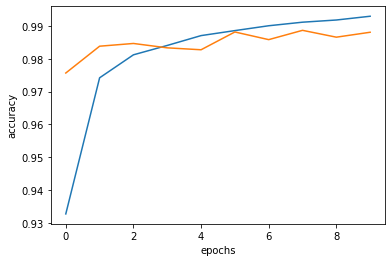

In [9]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel ('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

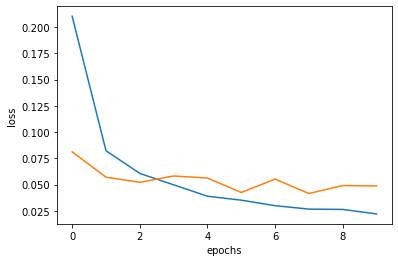

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel ('epochs')
plt.ylabel('loss')

In [11]:
pred = model.predict(xtest)
pred[8]
ytest_true[8]
ytest[8]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

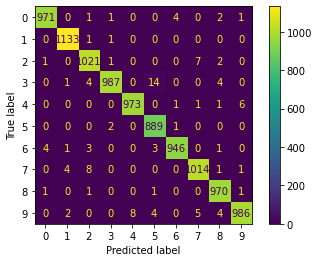

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(pred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(ytest_true))
disp.plot()

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

In [14]:
model.layers